In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.drop(
    ['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True
)

In [6]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
# titanic_df[
#     titanic_df.isnull(),any(axis=1)
# ].count()

In [16]:
titanic_df.dropna(inplace=True)

In [17]:
titanic_df.shape

(712, 8)

In [18]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

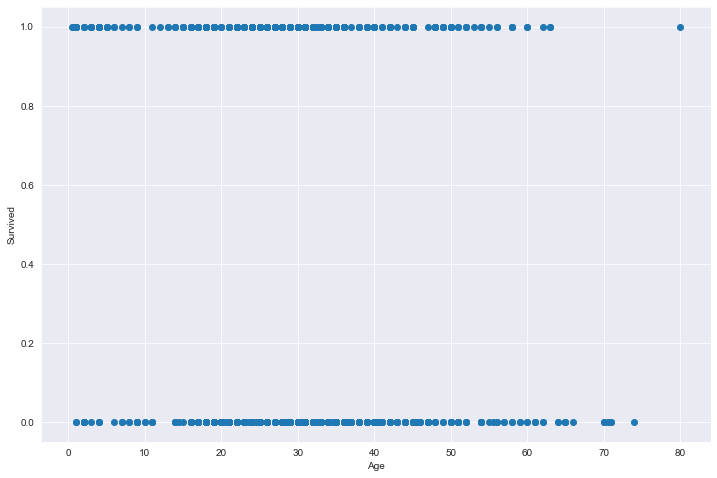

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(
    titanic_df['Age'],
    titanic_df['Survived']
)

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

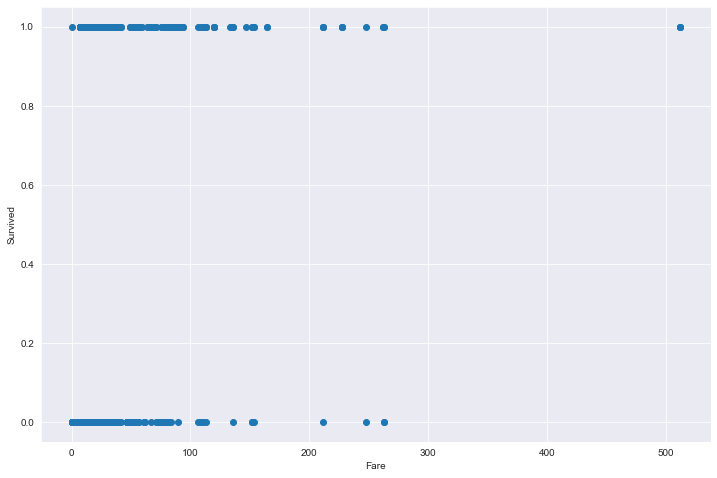

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(
    titanic_df['Fare'],
    titanic_df['Survived']
)

plt.xlabel('Fare')
plt.ylabel('Survived')

In [21]:
pd.crosstab(
    titanic_df['Sex'],
    titanic_df['Survived']
)

Survived,0,1
Sex,,
female,64,195
male,360,93


In [22]:
pd.crosstab(
    titanic_df['Pclass'],
    titanic_df['Survived']
)

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [23]:
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

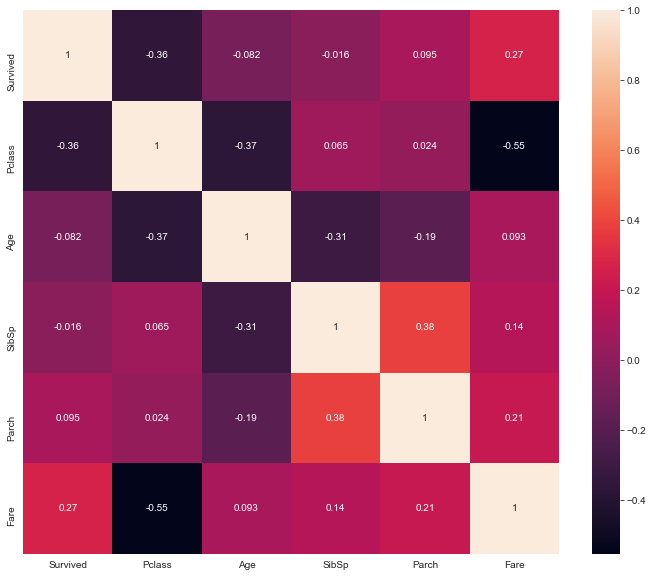

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(
    titanic_df.corr(),
    annot=True
)

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
# convert categorical to numerical
# label encoder for ordinal


In [27]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()


In [29]:
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'])

In [30]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [31]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [32]:
# convert categorical nominal to numeric using one-hot encoding

In [34]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
titanic_df = pd.get_dummies(titanic_df,columns=['Embarked'])

In [36]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0,1,0
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [37]:
# shuffle dataset

In [39]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,2,0,55.0,0,0,16.0000,0,0,1
1,0,3,1,45.5,0,0,7.2250,1,0,0
2,0,3,1,39.0,1,5,31.2750,0,0,1
3,0,2,1,39.0,0,0,13.0000,0,0,1
4,1,1,1,48.0,1,0,76.7292,1,0,0
...,...,...,...,...,...,...,...,...,...,...
707,1,1,1,36.0,0,1,512.3292,1,0,0
708,0,1,1,19.0,3,2,263.0000,0,0,1
709,0,2,1,19.0,1,1,36.7500,0,0,1
710,0,1,1,21.0,0,1,77.2875,0,0,1


# binary classification logistic regression

In [41]:
titanic_df = pd.read_csv('datasets/titanic_processed.csv')
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,14.0,0,0,7.8542,0,0,1
1,1,1,1,28.0,0,0,26.5500,0,0,1
2,1,1,0,36.0,1,2,120.0000,0,0,1
3,0,3,1,17.0,1,0,7.0542,0,0,1
4,0,3,1,4.0,4,2,31.2750,0,0,1


In [42]:
titanic_df.shape

(712, 10)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = titanic_df.drop('Survived',axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
logistic_model = LogisticRegression(
    penalty='l2', # regularize the model by applying a penalty on complex models
    C=1.0, # strength of regularization , inverse of regularization strength
            # smaller c stronger regularization
    solver='liblinear' # work well on smaller dataset
).fit(x_train,y_train)

In [49]:
# penalize complex models so that resulting model is robust and better prediction
# l2 penalty use l2 norm of the coefficients
# l2 sum of the square coefficient

In [50]:
y_pred = logistic_model.predict(x_test)

In [51]:
pred_results = pd.DataFrame(
    {
        'y_test':y_test,
        'y_pred':y_pred
    }
)

In [64]:
pred_results.shape[0] - (pred_results['y_test'].values == pred_results['y_pred'].values).sum()

36

In [65]:
pd.crosstab(pred_results['y_pred'],pred_results['y_test'])

y_test,0,1
y_pred,,
0,58,21
1,15,49


In [66]:
pred_results.shape

(143, 2)

In [68]:
accuracy = (58 + 49)/143
accuracy

0.7482517482517482

In [69]:
precision = 58 / (58 + 15)
precision

0.7945205479452054

In [70]:
recall = 58 / (58 + 21)
recall

0.7341772151898734

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [72]:
accuracy_score(y_test,y_pred)

0.7482517482517482

In [73]:
precision_score(y_test,y_pred)

0.765625

In [74]:
recall_score(y_test,y_pred)

0.7

In [75]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,58,15
1,21,49
